Acknowledgements 
- https://www.kaggle.com/ibjohnsson/predicting-listing-prices

- Dataset:  https://www.kaggle.com/airbnb/seattle

1. Setting up Kaggle API for Colab

https://colab.research.google.com/github/corrieann/kaggle/blob/master/kaggle_api_in_colab.ipynb#scrollTo=0HtGf0HEXEa5

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 74 bytes


In [2]:
!kaggle datasets download -d airbnb/seattle

 26% 5.00M/19.5M [00:00<00:02, 6.12MB/s]
100% 19.5M/19.5M [00:00<00:00, 21.1MB/s]


In [3]:
!unzip seattle.zip

Archive:  seattle.zip
  inflating: calendar.csv            
  inflating: listings.csv            
  inflating: reviews.csv             


In [4]:
import pandas as pd

# To display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
listings = pd.read_csv('/content/listings.csv')
reviews  = pd.read_csv('/content/reviews.csv')
calendar = pd.read_csv('/content/calendar.csv')

In [6]:
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [7]:
reviews.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...


In [8]:
calendar.head(2)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00


In [9]:
import numpy as np
list(set(listings['neighbourhood_group_cleansed'].unique()))

['Lake City',
 'Capitol Hill',
 'Rainier Valley',
 'Seward Park',
 'Downtown',
 'Other neighborhoods',
 'Central Area',
 'Ballard',
 'Magnolia',
 'Delridge',
 'Northgate',
 'Cascade',
 'Queen Anne',
 'West Seattle',
 'Beacon Hill',
 'Interbay',
 'University District']

In [10]:
len(list(set(listings['neighbourhood_group_cleansed'].unique())))

17

Pose at least three questions related to business or real-world applications of how the data could be used.


1.   Which areas are widely preferred by guests to stay?
2.   How responsive are hosts for any sort of queries?
3.   What room types are available to different price range?
4.   Can we have a prediction based model to for house pricing?

Prepare data:

- Gather necessary data to answer your questions
- Handle categorical and missing data
- Provide insight into the methods you chose and why you chose them

Question 1: Which areas are widely preferred by guests to stay?

- We have one column named 'neighbourhood_group_cleansed' which we can use against 'review_scores_rating' to get some insights for this. Ratings given by the guests can give us some sort of intuition about the area and locality.

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

In [12]:
neighbor_avg_ratings=listings.groupby(["neighbourhood_group_cleansed"]).mean()

In [13]:
neighbor_avg_ratings_grouped=neighbor_avg_ratings['review_scores_rating'].sort_values(ascending=False)

Text(0, 0.5, 'Average Ratings by Guests')

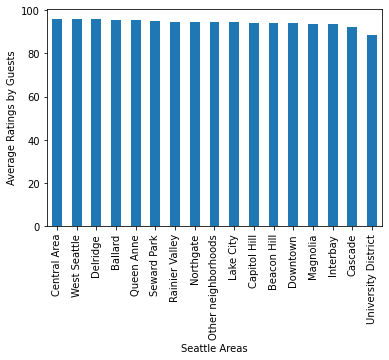

In [14]:
plot1=neighbor_avg_ratings_grouped.plot(kind="bar")
plot1.set_xlabel("Seattle Areas")
plot1.set_ylabel("Average Ratings by Guests")

Ans1: Average ratings suggests that almost every region in Seattle is pretty popular to stay with highest rating being for Central Area and lowest for University District

Question 2: How responsive are hosts for any sort of queries?

- We want to know how friendly are the hosts. This will help us know how they respond in case of any possible and unforsaken problems. We have 'host_Response_rate' which we can use against neighborhood areas to check that

In [15]:
x=[]
for i in range(len(listings)):
  y=str(listings['host_response_rate'][i])
  x.append(float(y.strip('%')))

In [16]:
listings['host_response_rate_new']=x

In [17]:
listings2=listings.copy()

In [18]:
listings2.drop(columns=['host_response_rate'],inplace=True)

In [19]:
listings2.rename(columns={'host_response_rate_new':'host_response_rate'},inplace=True)

In [20]:
response_rate=listings2.groupby(['neighbourhood_group_cleansed']).mean()

In [21]:
response_rate_grouped=response_rate['host_response_rate'].sort_values(ascending=False)

Text(0.5, 0, 'City Areas')

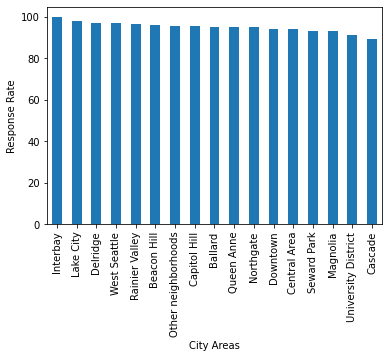

In [22]:
plot2 = response_rate_grouped.plot(kind="bar")
plot2.set_ylabel('Response Rate')
plot2.set_xlabel('City Areas')

Ans2: Hosts from Interbay city are the most responsive ones as compared to others with least responsive being from the city Cascade

Question 3: What room types are available to different price range?
- For this we have 'room_type' available which we can use against 'price'. We need to do data clean-up for price to remove unwanted special character and make it as float

In [23]:
listings['price'].head(1)

0    $85.00
Name: price, dtype: object

In [24]:
# Since price has $ sign here, we need to remove it and convert it to float 
listings2['price']=listings2['price'].str.replace("[$, ]","").astype("float")

In [25]:
listings2['price'].head(1)

0    85.0
Name: price, dtype: float64

Text(0.5, 0, 'Price')

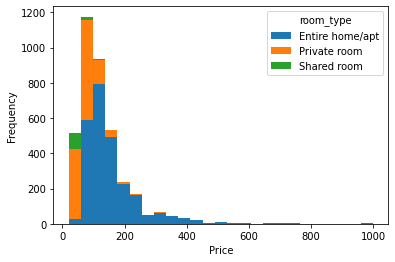

In [26]:
listings2.pivot(columns='room_type',values='price').plot.hist(stacked=True,bins=25)
plt.xlabel('Price')

Ans3: Private rooms are the most preferred ones by the guests having price range less than $ 200 

Question 4: Can we have a prediction based model to for house pricing?
- For simplicity sake, we will choose some of the important numeric variables and check the distribution for it.
- Then we will check the null values in our dataset, ideally we can drop less than 5% values.
- Data Cleaning - 

1. We will remove unwanted special characters from numeric variables
2. We will create dummy variables for categorical variables for our model to understand it since it is a regression problem
3. We will create and run 3 models for our usecase: Statistical model(OLS), Scikitlearn - Linear Regression model and Ensemble model - RandomForest


In [27]:
cols = ['number_of_reviews','host_acceptance_rate','host_listings_count','accommodates',
       'bathrooms','bedrooms','beds','price']

In [28]:
import seaborn as sns

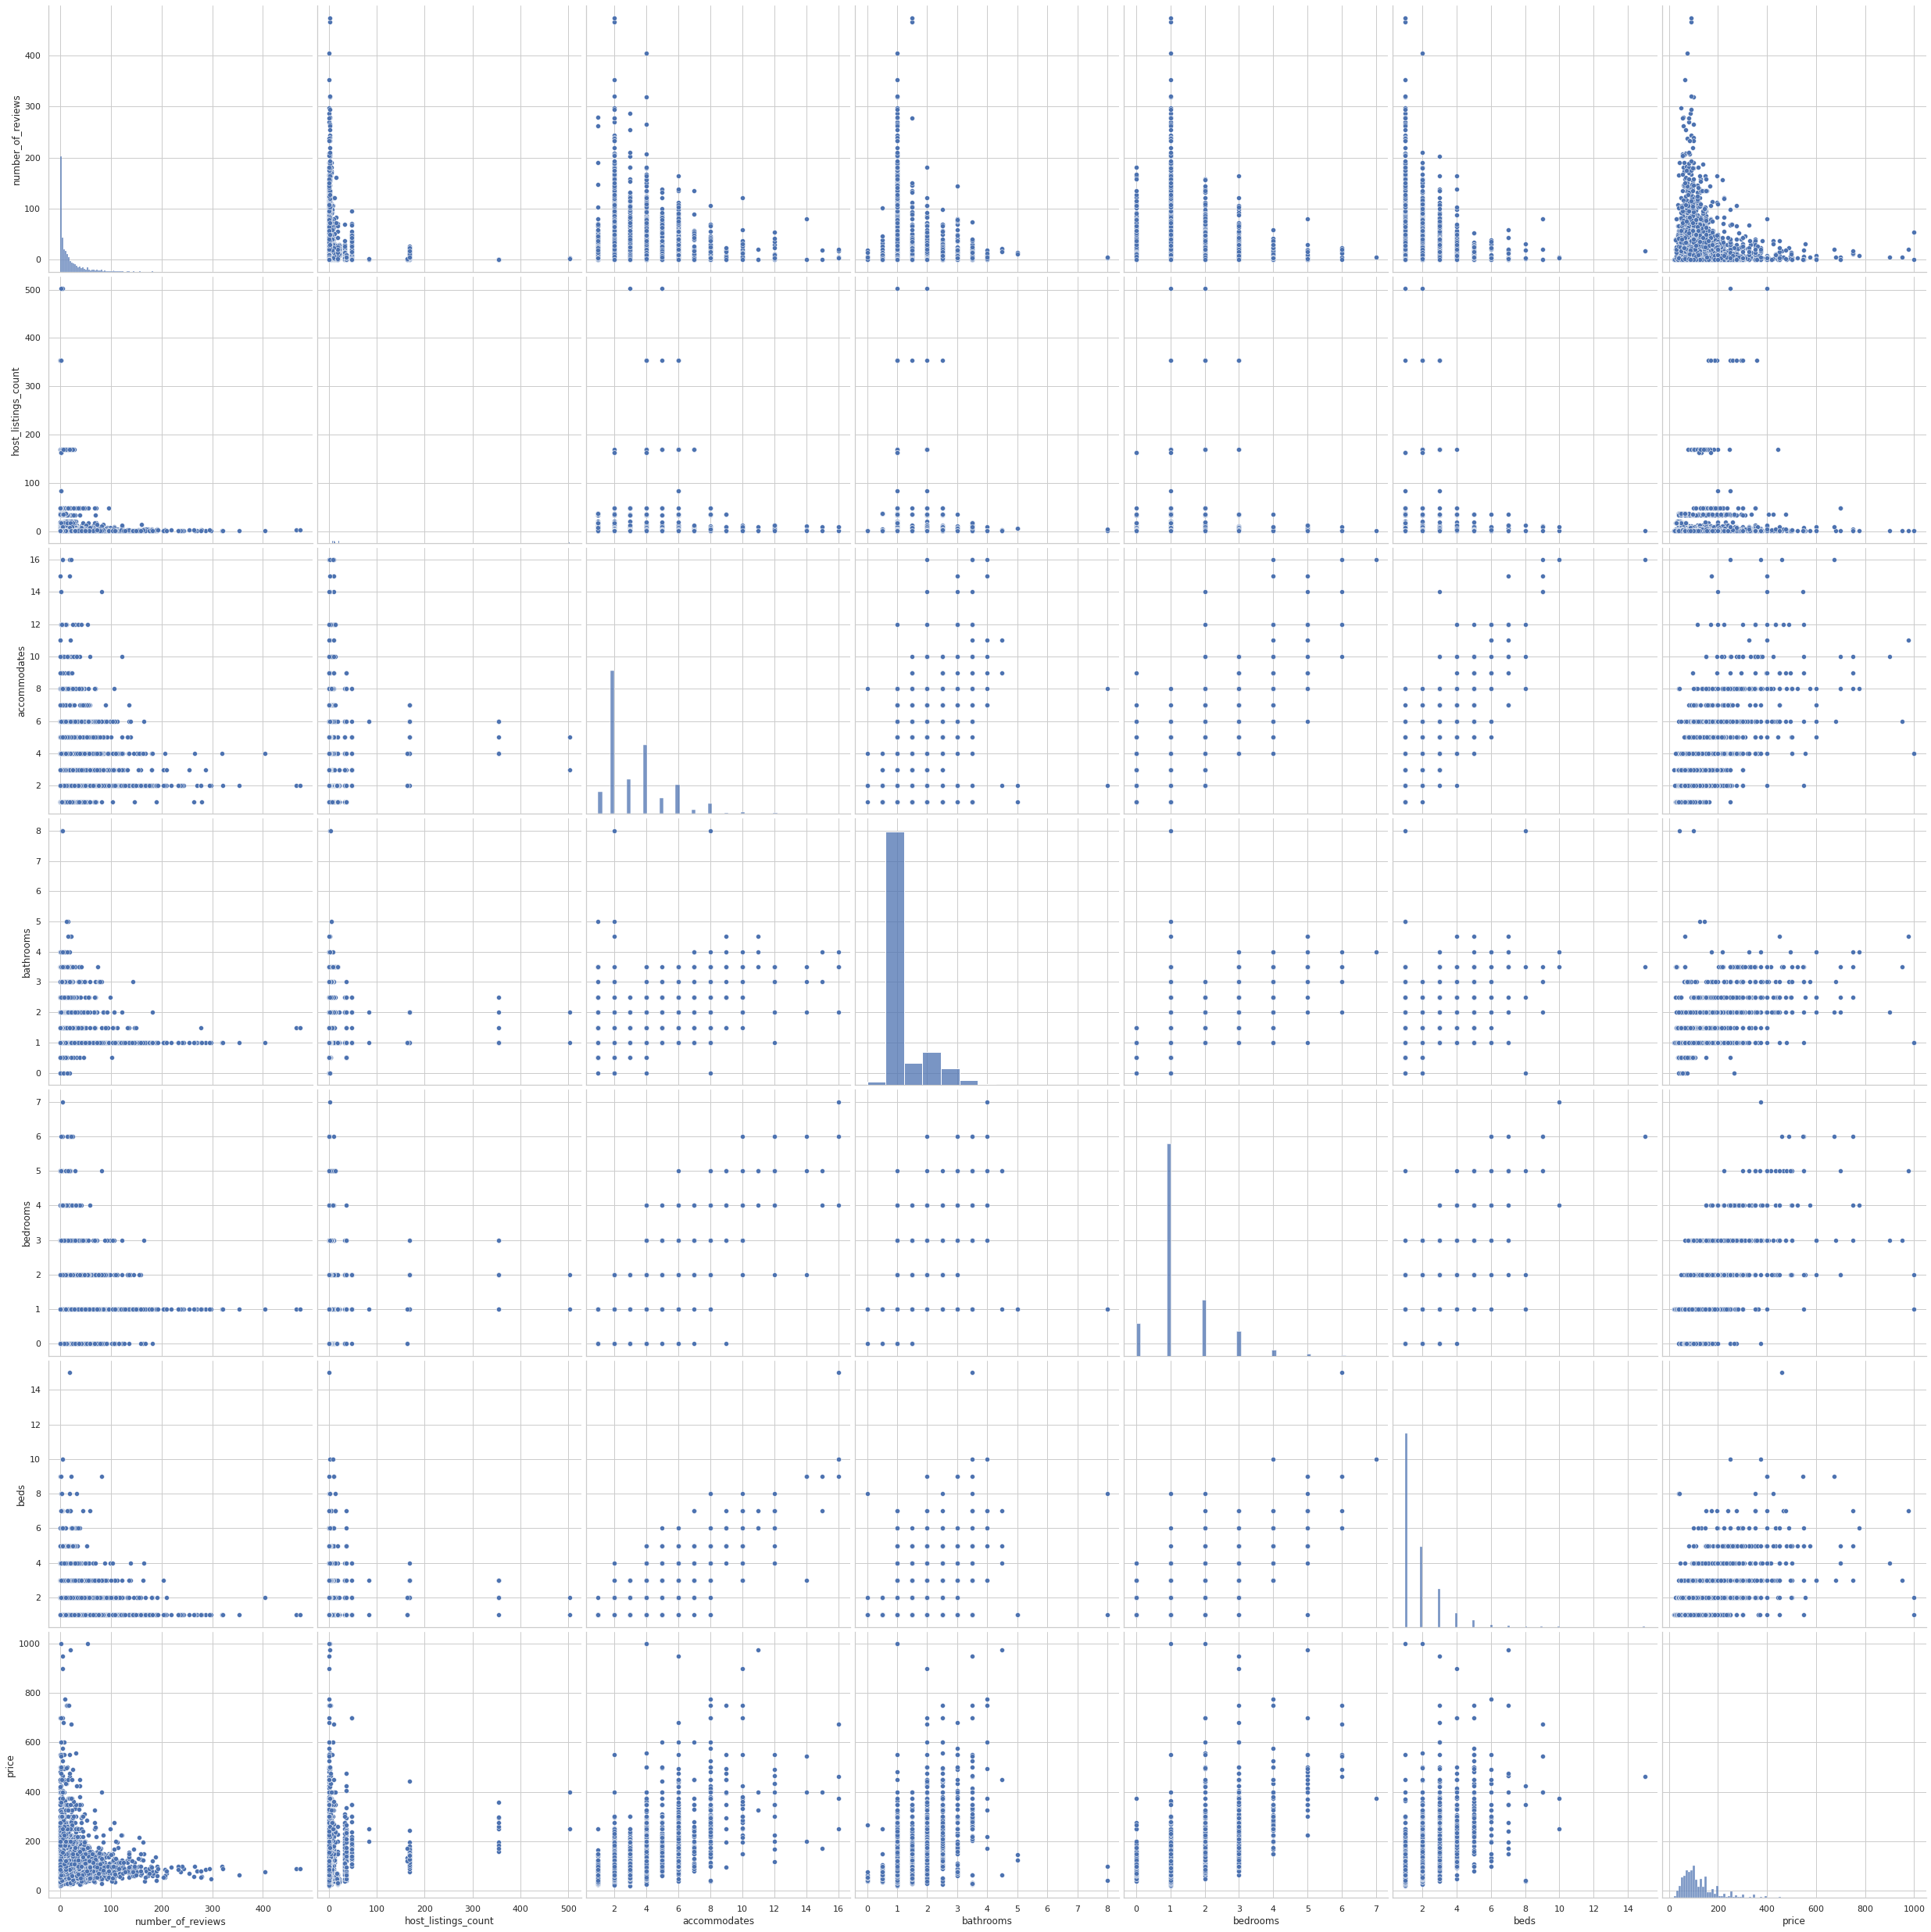

In [29]:
sns.set(style='whitegrid',context='notebook')
sns.pairplot(listings2[cols],height=5)
plt.show()

In [30]:
null_listings = pd.DataFrame()
null_listings =listings.isna().sum()/len(listings)*100

In [31]:
null_listings.sort_values(ascending=False)

license                             100.000000
square_feet                          97.459403
monthly_price                        60.267156
security_deposit                     51.126244
weekly_price                         47.380828
notes                                42.063908
neighborhood_overview                27.029859
cleaning_fee                         26.977475
transit                              24.463070
host_about                           22.498690
host_acceptance_rate                 20.246202
review_scores_checkin                17.234154
review_scores_accuracy               17.234154
review_scores_value                  17.181771
review_scores_location               17.155579
review_scores_cleanliness            17.103195
review_scores_communication          17.050812
review_scores_rating                 16.946045
last_review                          16.422211
first_review                         16.422211
reviews_per_month                    16.422211
space        

In [32]:
listings.shape

(3818, 93)

In [33]:
df = listings[["host_response_rate", "host_acceptance_rate", "host_is_superhost",
               "host_listings_count", "zipcode", "property_type","room_type", "accommodates", 
               "bathrooms", "bedrooms", 
               "beds", "price", "number_of_reviews", "review_scores_rating", "cancellation_policy", 
               "reviews_per_month"]]

In [34]:
df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month
0,96%,100%,f,3.0,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,$85.00,207,95.0,moderate,4.07
1,98%,100%,t,6.0,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,$150.00,43,96.0,strict,1.48
2,67%,100%,f,2.0,98119,House,Entire home/apt,11,4.5,5.0,7.0,$975.00,20,97.0,strict,1.15
3,NaN,NaN,f,1.0,98119,Apartment,Entire home/apt,3,1.0,0.0,2.0,$100.00,0,NaN,flexible,NaN
4,100%,NaN,f,2.0,98119,House,Entire home/apt,6,2.0,3.0,3.0,$450.00,38,92.0,strict,0.89


In [35]:
df.shape

(3818, 16)

In [36]:
listings.shape

(3818, 93)

In [37]:
df2 = df.dropna(axis=0)

In [38]:
df2.shape

(2656, 16)

In [39]:
df2.isna().sum()*100

host_response_rate      0
host_acceptance_rate    0
host_is_superhost       0
host_listings_count     0
zipcode                 0
property_type           0
room_type               0
accommodates            0
bathrooms               0
bedrooms                0
beds                    0
price                   0
number_of_reviews       0
review_scores_rating    0
cancellation_policy     0
reviews_per_month       0
dtype: int64

Data Cleaning

In [40]:
pd.options.mode.chained_assignment = None  # default='warn'
df2['host_acceptance_rate'] = df2['host_acceptance_rate'].str.replace("%", "").astype("float")
df2['price'] = df2['price'].str.replace("[$, ]", "").astype("float")
df2['host_response_rate'] = df2['host_response_rate'].str.replace("%", "").astype("float")

In [41]:
df2['superhost']=np.where(df2['host_is_superhost']=='t',1,0)
del df2['host_is_superhost']

In [42]:
# select non-numeric variables and create dummies
non_num_vars = df2.select_dtypes(include=['object']).columns
df2[non_num_vars].head()

,zipcode,property_type,room_type,cancellation_policy
0,98119,Apartment,Entire home/apt,moderate
1,98119,Apartment,Entire home/apt,strict
2,98119,House,Entire home/apt,strict
6,98119,House,Private room,moderate
7,98119,Cabin,Private room,strict


In [43]:
dummy_vars = pd.get_dummies(df2[non_num_vars])
dummy_vars.head()

,zipcode_98101,zipcode_98102,zipcode_98103,zipcode_98104,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98121,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98134,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98177,zipcode_98178,zipcode_98199,zipcode_99\n98122,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [44]:
# drop non-numeric variables from df2 and add the dummies
df3=df2.drop(non_num_vars,axis=1)
df3 = pd.merge(df3,dummy_vars, left_index=True, right_index=True)
df3.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,reviews_per_month,superhost,zipcode_98101,zipcode_98102,zipcode_98103,zipcode_98104,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98121,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98134,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98177,zipcode_98178,zipcode_98199,zipcode_99\n98122,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,96.0,100.0,3.0,4,1.0,1.0,1.0,85.0,207,95.0,4.07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,98.0,100.0,6.0,4,1.0,1.0,1.0,150.0,43,96.0,1.48,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,67.0,100.0,2.0,11,4.5,5.0,7.0,975.0,20,97.0,1.15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
6,100.0,100.0,1.0,2,1.0,1.0,1.0,80.0,58,99.0,2.46,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
7,100.0,100.0,5.0,2,1.0,1.0,1.0,60.0,173,97.0,4.73,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [45]:
# split into test and training data
np.random.seed(1)
indices = np.random.permutation(len(df3))
train_size = int(round(0.8*len(df3)))
test_size = len(df3)-train_size

y = df3['price']
x = df3.drop('price', axis =1)

x.train = x.iloc[indices[0:train_size]]
y.train = y.iloc[indices[0:train_size]]
x.test = x.iloc[indices[train_size+1:]]
y.test = y.iloc[indices[train_size+1:]]

x2 = x.train.values
y2 = y.train.values

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


In [46]:
type(x2)

numpy.ndarray

In [47]:
import statsmodels.api as sm
olsmod = sm.OLS(y2,x2)
olsres = olsmod.fit()
print(olsres.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     73.20
Date:                Thu, 21 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:07:22   Log-Likelihood:                -11196.
No. Observations:                2125   AIC:                         2.251e+04
Df Residuals:                    2067   BIC:                         2.284e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1913      0.100     -1.922      0.0

In [48]:
x0 = x.test.values
y0 = y.test.values

In [49]:
ypred = olsres.predict(x0) # out of sample prediction
from sklearn.metrics import mean_squared_error
from math import sqrt
rms_ols = sqrt(mean_squared_error(y0,ypred))
print('RMS OLS: ',rms_ols)

RMS OLS:  56.38292278388184


In [50]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
slr = linear_model.LinearRegression(normalize=True)
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

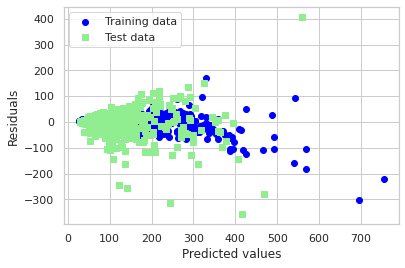

In [58]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.show()

In [59]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

rms_ols2=sqrt(mean_squared_error(y_test,y_test_pred))
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 360.189, test: 2275.509
R^2 train: 0.945, test: 0.670


In [60]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 360.189, test: 2275.509
R^2 train: 0.945, test: 0.670


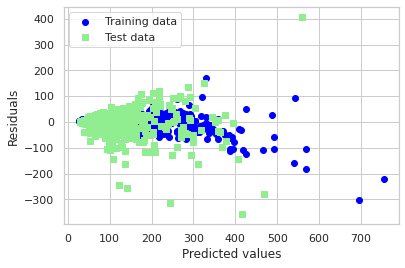

In [61]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.show()

In [62]:
rmse_randfor=sqrt(mean_squared_error(y_test,y_test_pred))

In [63]:
compare = pd.Series( [rms_ols, rms_ols2, rmse_randfor], index = ["ols1","ols2","random forest"])
compare

ols1             56.382923
ols2             47.702291
random forest    47.702291
dtype: float64